In [1]:
import os 
import pandas as pd
import numpy as np
import shutil

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings

warnings.filterwarnings('ignore')

PATH='HR_Analytics.csv'

df = pd.read_csv(PATH)


pd.options.display.max_columns = None



df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9.0


In [2]:
#Veri tipleri ve genel bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [3]:
#Sayısal verilerin özeti (ort, min, max)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
#Sütun başlıkları
df.columns


Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

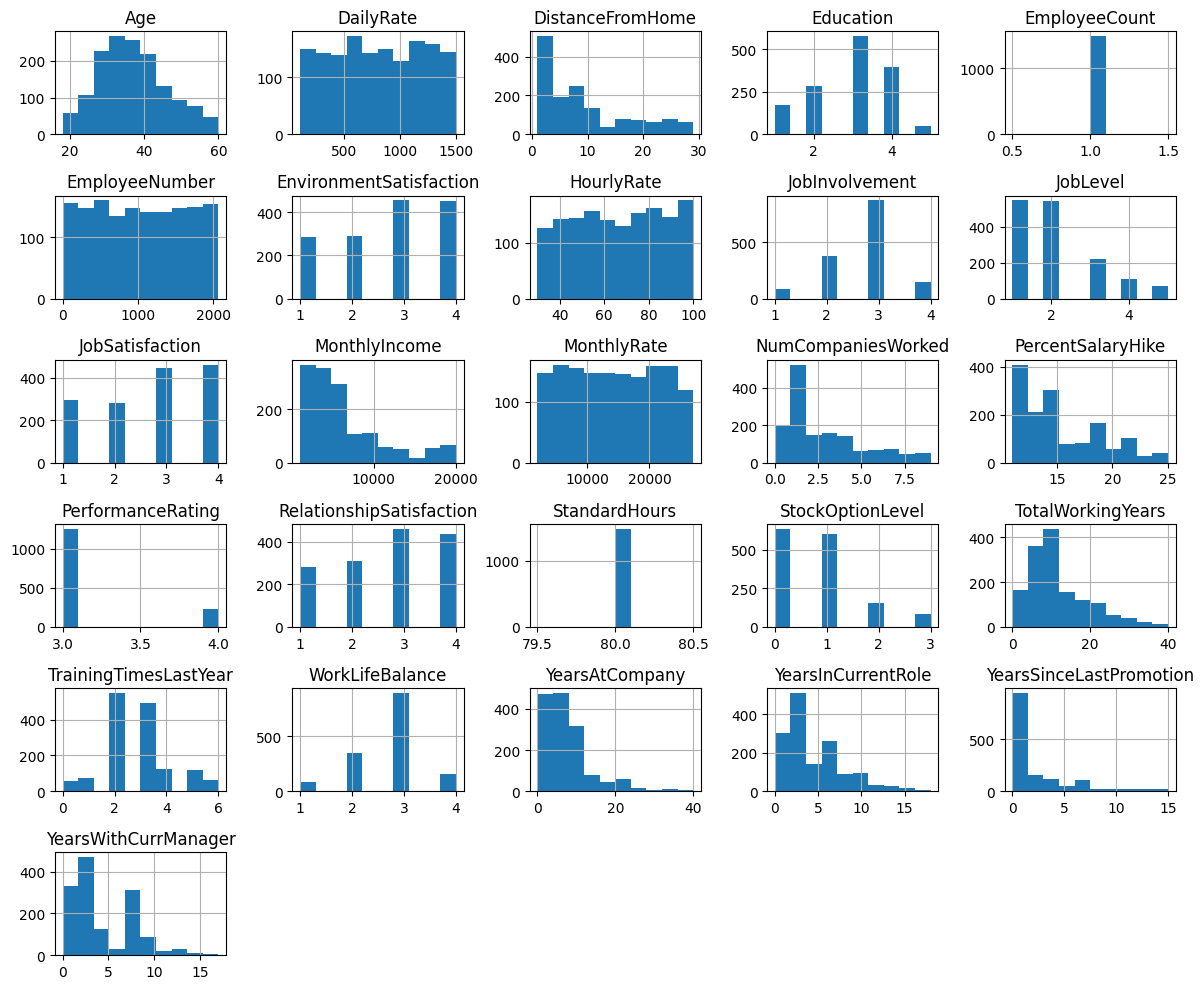

In [5]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [2]:
#Toplam kopya satır sayısı
df.duplicated().sum()

np.int64(7)

In [3]:

#Kopya satırları görüntüle
df[df.duplicated()]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0
1305,RM1469,49,46-55,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,5k-10k,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,10k-15k,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0.0


In [4]:
# Kopyaları  sil
df = df.drop_duplicates()

df[df.duplicated()]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [5]:
#Id sütunundaki kopyaları sil
df.duplicated('EmpID').sum()

df[df.duplicated('EmpID',keep = False)]


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,5.0
802,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,Upto 5k,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3.0
803,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,Upto 5k,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,2.0
953,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,5k-10k,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7.0
955,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,5k-10k,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,1.0


In [7]:
df =df.drop_duplicates('EmpID')
df.duplicated('EmpID').sum()

np.int64(0)

In [8]:
#Eksik (boş) veri sayısı
df.isnull().sum()


EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [12]:
# Boş olan degerleri doldurmak için medyan kullanma
df['YearsWithCurrManager'].describe()

count    1413.000000
mean        4.120311
std         3.561633
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [9]:
median = df['YearsWithCurrManager'].median()


df['YearsWithCurrManager']=df['YearsWithCurrManager'].fillna(median)



In [15]:
df['YearsWithCurrManager'].isnull().sum()

np.int64(0)

In [14]:
for col in df.columns:
    print(df[col].value_counts())

#Hatalı veri temizliği 
#BusinessTravel sütununda 'TravelRarely' yerine 'Travel_Rarely' olmalı

EmpID
RM1210    1
RM297     1
RM302     1
RM458     1
RM728     1
         ..
RM488     1
RM103     1
RM910     1
RM893     1
RM854     1
Name: count, Length: 1470, dtype: int64
Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
23    14
56    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
AgeGroup
26-35    606
36-45    468
46-55    226
18-25    123
55+       47
Name: count, dtype: int64
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1036
Travel_Frequently     277
Non-Travel            150
TravelRarely            7
Name: count, dtype: int64
DailyRate
691     6
1082    5
329     5
408     5
1329    5
       ..
1435    1
818     1
1429    1


In [10]:
df['BusinessTravel'] = df['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely')

df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [16]:
df

#Binary: 'Attrition','OverTime','Gender','Over18'

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9.0


In [11]:
#Label Encoding(Binary Encoding)
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})
df['Gender']=df['Gender'].map({'Male':1 ,'Female':0})
df['Over18']=df['Over18'].map({'Y':1,'N':0})

#df.Gender.value_counts()

df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,1,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,1,0,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,0,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,1,0,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,1,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,1,1,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,1,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,1,0,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,1,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,1,0,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,0,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,0,41,3,5,Manager,1,Married,19566,15k+,3854,5,1,0,11,3,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,0,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,0,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,1,0,19,3,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,0,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,1,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,1,0,14,3,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,0,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,1,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,1,1,18,3,2,80,1,12,3,3,11,7,1,9.0


In [12]:
#Dummy datalar:'BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus'
#One-Hot Encoding
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus'], drop_first=True)

df

,EmpID,Age,AgeGroup,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,RM297,18,18-25,1,230,3,3,1,405,3,1,54,3,1,3,1420,Upto 5k,25233,1,1,0,13,3,3,80,0,0,2,3,0,0,0,0.0,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,RM302,18,18-25,0,812,10,3,1,411,4,0,69,2,1,3,1200,Upto 5k,9724,1,1,0,12,3,1,80,0,0,2,3,0,0,0,0.0,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
2,RM458,18,18-25,1,1306,5,3,1,614,2,1,69,3,1,2,1878,Upto 5k,8059,1,1,1,14,3,4,80,0,0,3,3,0,0,0,0.0,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
3,RM728,18,18-25,0,287,5,2,1,1012,2,1,73,3,1,4,1051,Upto 5k,13493,1,1,0,15,3,4,80,0,0,2,3,0,0,0,0.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,RM829,18,18-25,1,247,8,1,1,1156,3,1,80,3,1,3,1904,Upto 5k,13556,1,1,0,12,3,4,80,0,0,0,3,0,0,0,0.0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,0,422,7,3,1,549,1,0,41,3,5,1,19566,15k+,3854,5,1,0,11,3,4,80,0,33,5,1,29,8,11,10.0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1476,RM428,60,55+,0,1499,28,3,1,573,3,0,80,2,3,1,10266,10k-15k,2845,4,1,0,19,3,4,80,0,22,5,4,18,13,13,11.0,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1477,RM537,60,55+,0,1179,16,4,1,732,1,1,84,3,2,1,5405,5k-10k,11924,8,1,0,14,3,4,80,0,10,1,3,2,2,2,2.0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1478,RM880,60,55+,0,696,7,4,1,1233,2,1,52,4,2,4,5220,5k-10k,10893,0,1,1,18,3,2,80,1,12,3,3,11,7,1,9.0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [13]:
df = df.replace({True: 1, False: 0})

df

,EmpID,Age,AgeGroup,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,RM297,18,18-25,1,230,3,3,1,405,3,1,54,3,1,3,1420,Upto 5k,25233,1,1,0,13,3,3,80,0,0,2,3,0,0,0,0.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,RM302,18,18-25,0,812,10,3,1,411,4,0,69,2,1,3,1200,Upto 5k,9724,1,1,0,12,3,1,80,0,0,2,3,0,0,0,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,RM458,18,18-25,1,1306,5,3,1,614,2,1,69,3,1,2,1878,Upto 5k,8059,1,1,1,14,3,4,80,0,0,3,3,0,0,0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,RM728,18,18-25,0,287,5,2,1,1012,2,1,73,3,1,4,1051,Upto 5k,13493,1,1,0,15,3,4,80,0,0,2,3,0,0,0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,RM829,18,18-25,1,247,8,1,1,1156,3,1,80,3,1,3,1904,Upto 5k,13556,1,1,0,12,3,4,80,0,0,0,3,0,0,0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,0,422,7,3,1,549,1,0,41,3,5,1,19566,15k+,3854,5,1,0,11,3,4,80,0,33,5,1,29,8,11,10.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1476,RM428,60,55+,0,1499,28,3,1,573,3,0,80,2,3,1,10266,10k-15k,2845,4,1,0,19,3,4,80,0,22,5,4,18,13,13,11.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1477,RM537,60,55+,0,1179,16,4,1,732,1,1,84,3,2,1,5405,5k-10k,11924,8,1,0,14,3,4,80,0,10,1,3,2,2,2,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1478,RM880,60,55+,0,696,7,4,1,1233,2,1,52,4,2,4,5220,5k-10k,10893,0,1,1,18,3,2,80,1,12,3,3,11,7,1,9.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


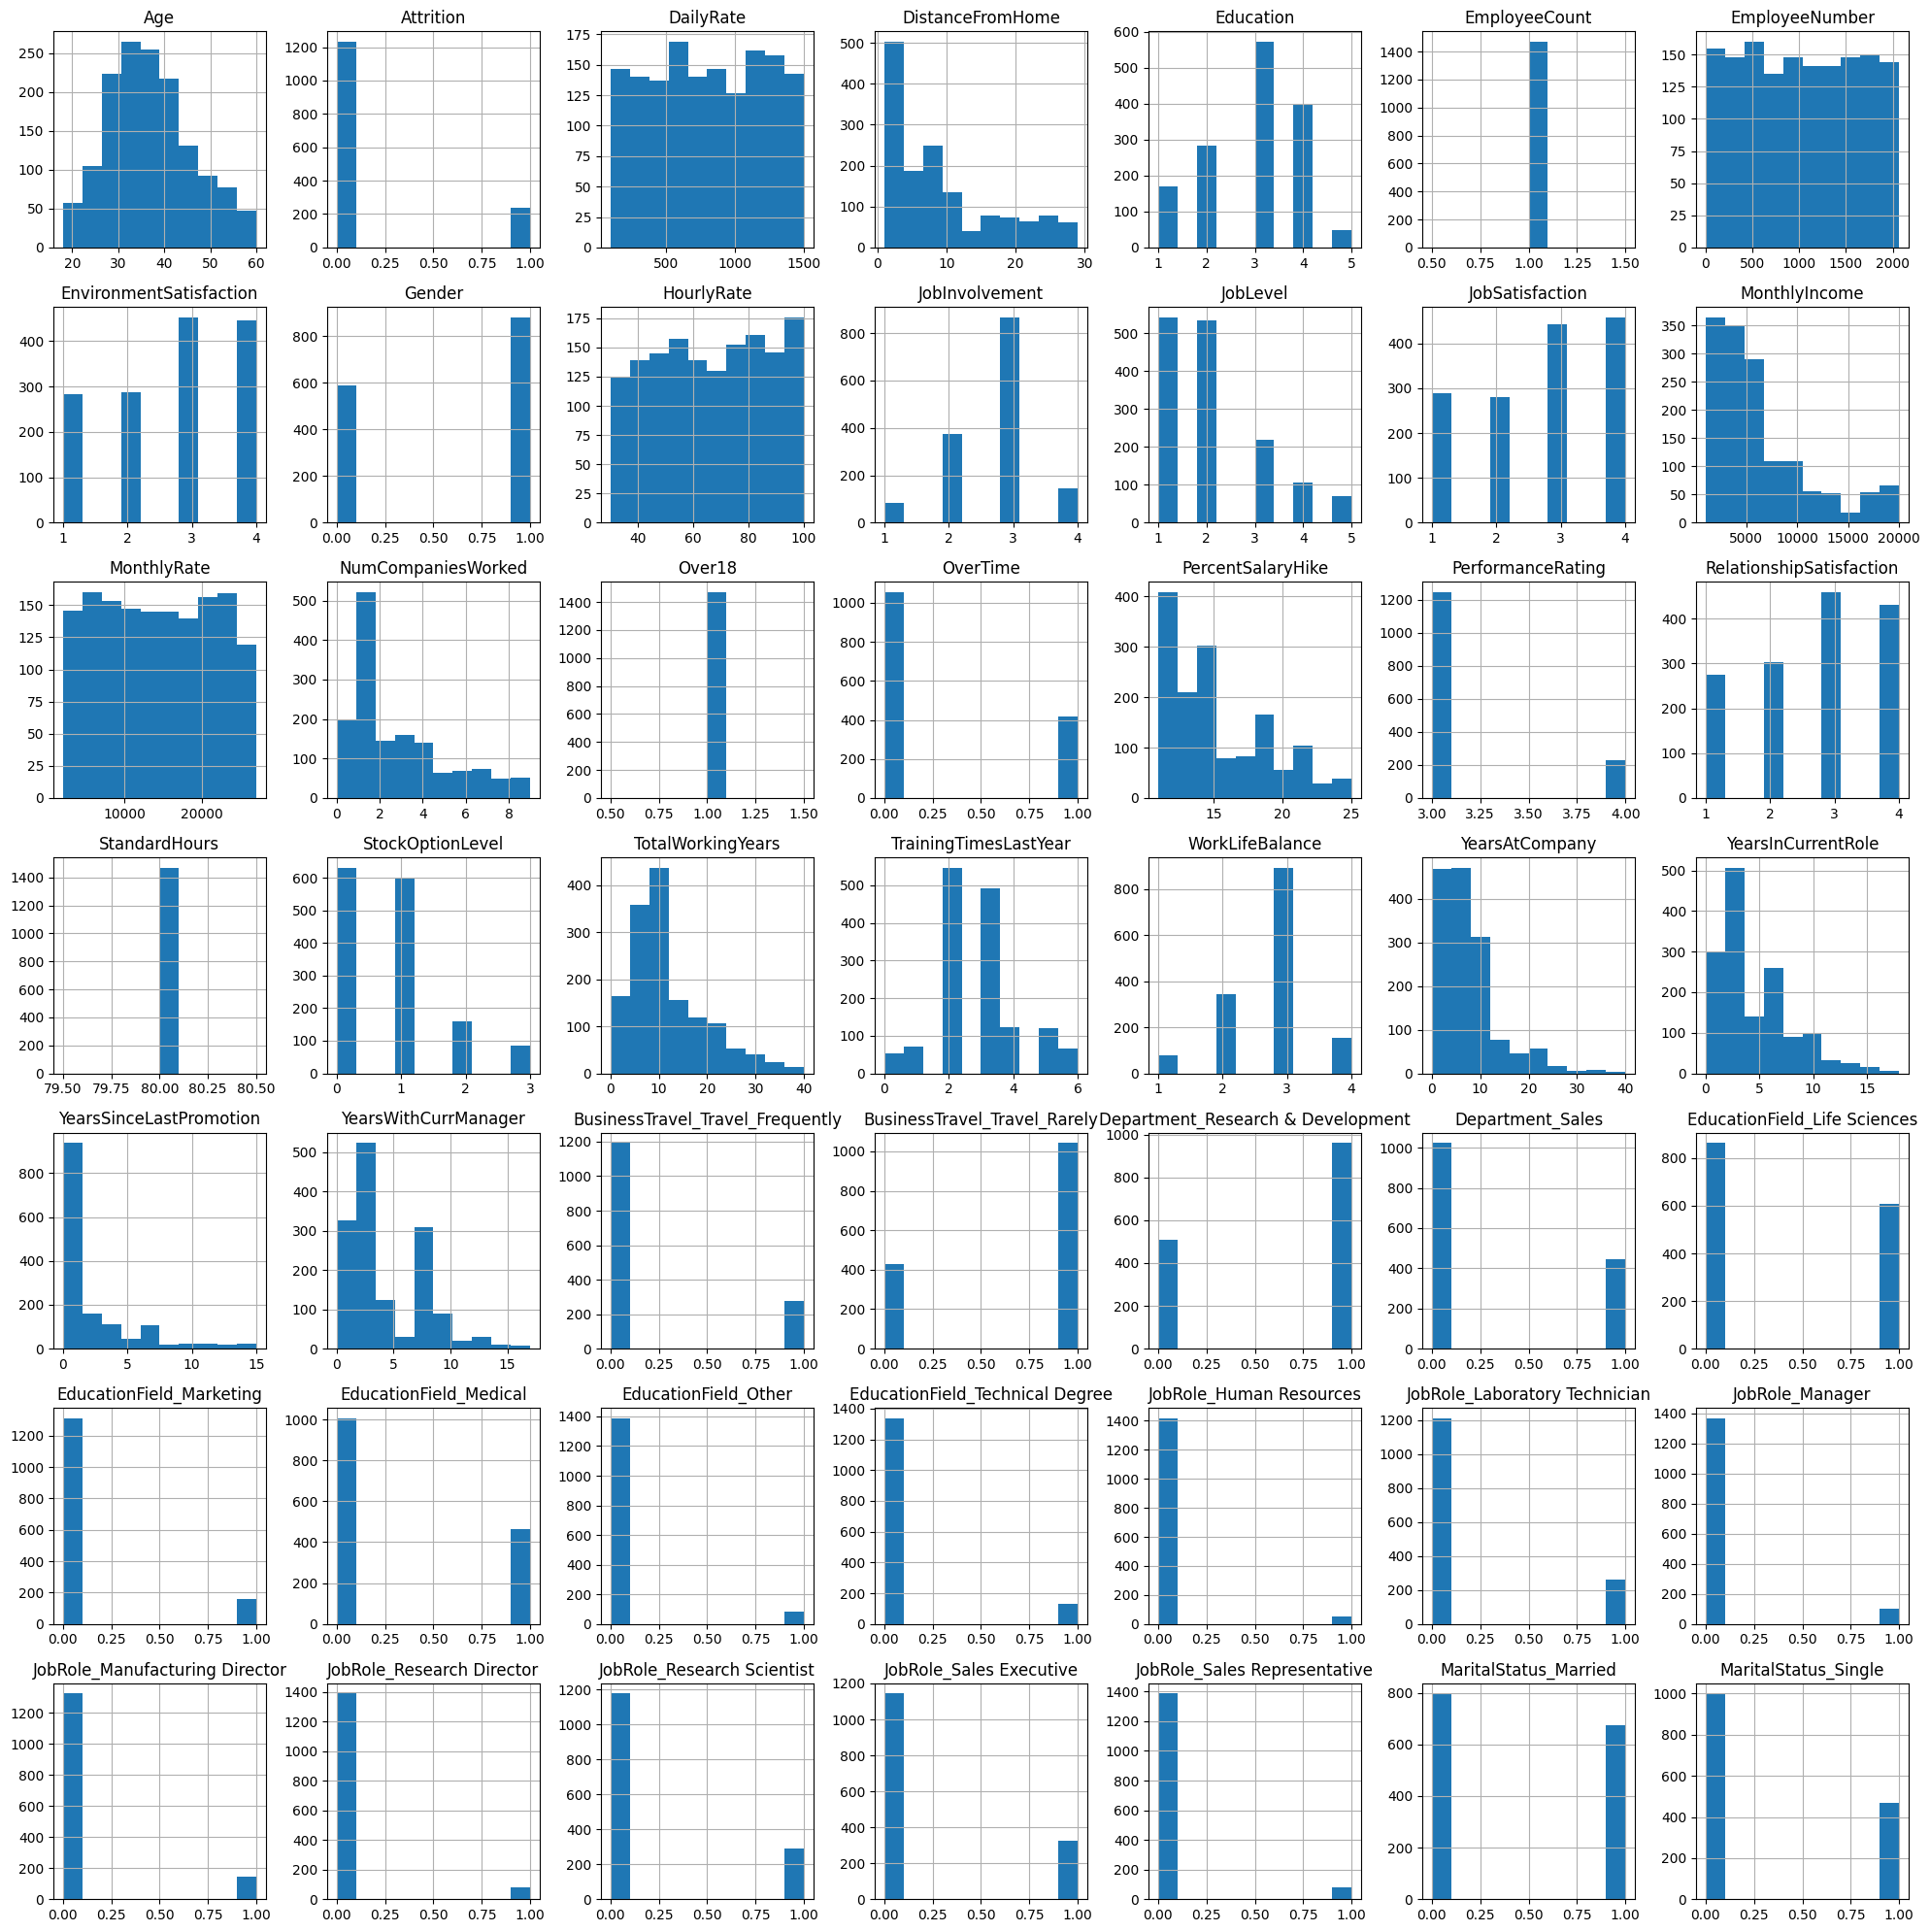

In [14]:

df.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

In [15]:
#Gereksiz featurelar :'EmpID', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'
#Agegroup , SalarySlab silinebilir.

df=df.drop(['EmpID', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)


df=df.drop(['AgeGroup', 'SalarySlab'], axis=1)

df


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,18,1,230,3,3,3,1,54,3,1,3,1420,25233,1,0,13,3,3,0,0,2,3,0,0,0,0.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,18,0,812,10,3,4,0,69,2,1,3,1200,9724,1,0,12,3,1,0,0,2,3,0,0,0,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,18,1,1306,5,3,2,1,69,3,1,2,1878,8059,1,1,14,3,4,0,0,3,3,0,0,0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,18,0,287,5,2,2,1,73,3,1,4,1051,13493,1,0,15,3,4,0,0,2,3,0,0,0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,18,1,247,8,1,3,1,80,3,1,3,1904,13556,1,0,12,3,4,0,0,0,3,0,0,0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,0,422,7,3,1,0,41,3,5,1,19566,3854,5,0,11,3,4,0,33,5,1,29,8,11,10.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1476,60,0,1499,28,3,3,0,80,2,3,1,10266,2845,4,0,19,3,4,0,22,5,4,18,13,13,11.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1477,60,0,1179,16,4,1,1,84,3,2,1,5405,11924,8,0,14,3,4,0,10,1,3,2,2,2,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1478,60,0,696,7,4,2,1,52,4,2,4,5220,10893,0,1,18,3,2,1,12,3,3,11,7,1,9.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


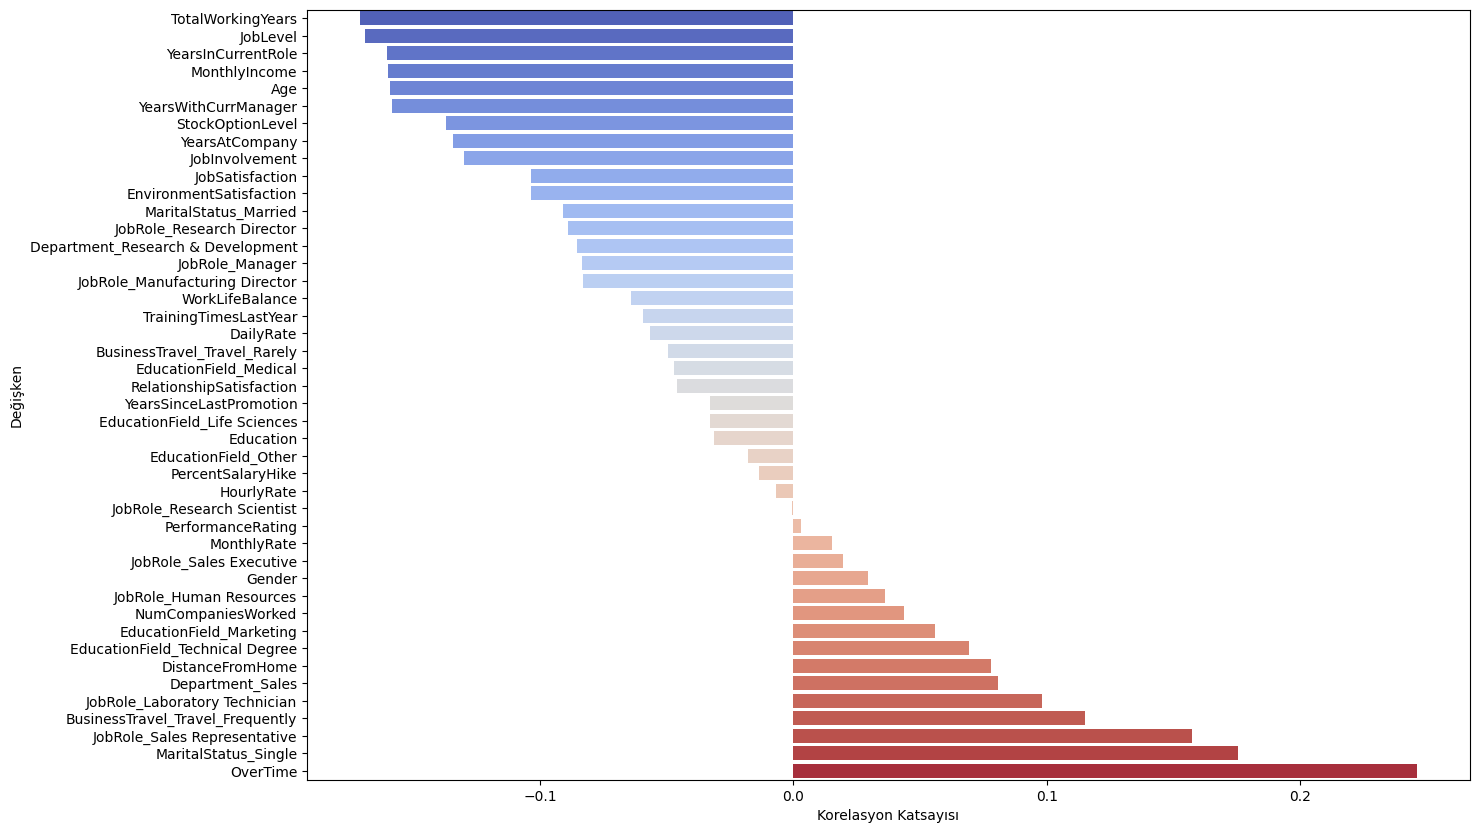

In [16]:
corr = df.corr(numeric_only=True)
att_corr = corr['Attrition'].drop('Attrition').sort_values()
plt.figure(figsize=(15, 10))

sns.barplot(x=att_corr.values, y=att_corr.index,palette='coolwarm')
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Değişken")

plt.show()


In [23]:
df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report



X,y = df.drop('Attrition', axis=1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Decision Tree Classifier Accuracy:0.7789
#Düşük accuracy.
#Bazı parametrelere önem değeri atamadı.

#model = DecisionTreeClassifier(random_state=42)

#Random Forest Classifier Accuracy: 0.8673
#Düşük recall.

#model = RandomForestClassifier(random_state=42)

#Gradient Boosting Classifier Accuracy: 0.8843

#model = GradientBoostingClassifier(random_state=42)

#Accuracy:0.9013
model = GradientBoostingClassifier(random_state=42,n_estimators=300, max_features=3)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))




Accuracy: 0.9013605442176871
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.80      0.51      0.62        47

    accuracy                           0.90       294
   macro avg       0.86      0.74      0.78       294
weighted avg       0.89      0.90      0.89       294



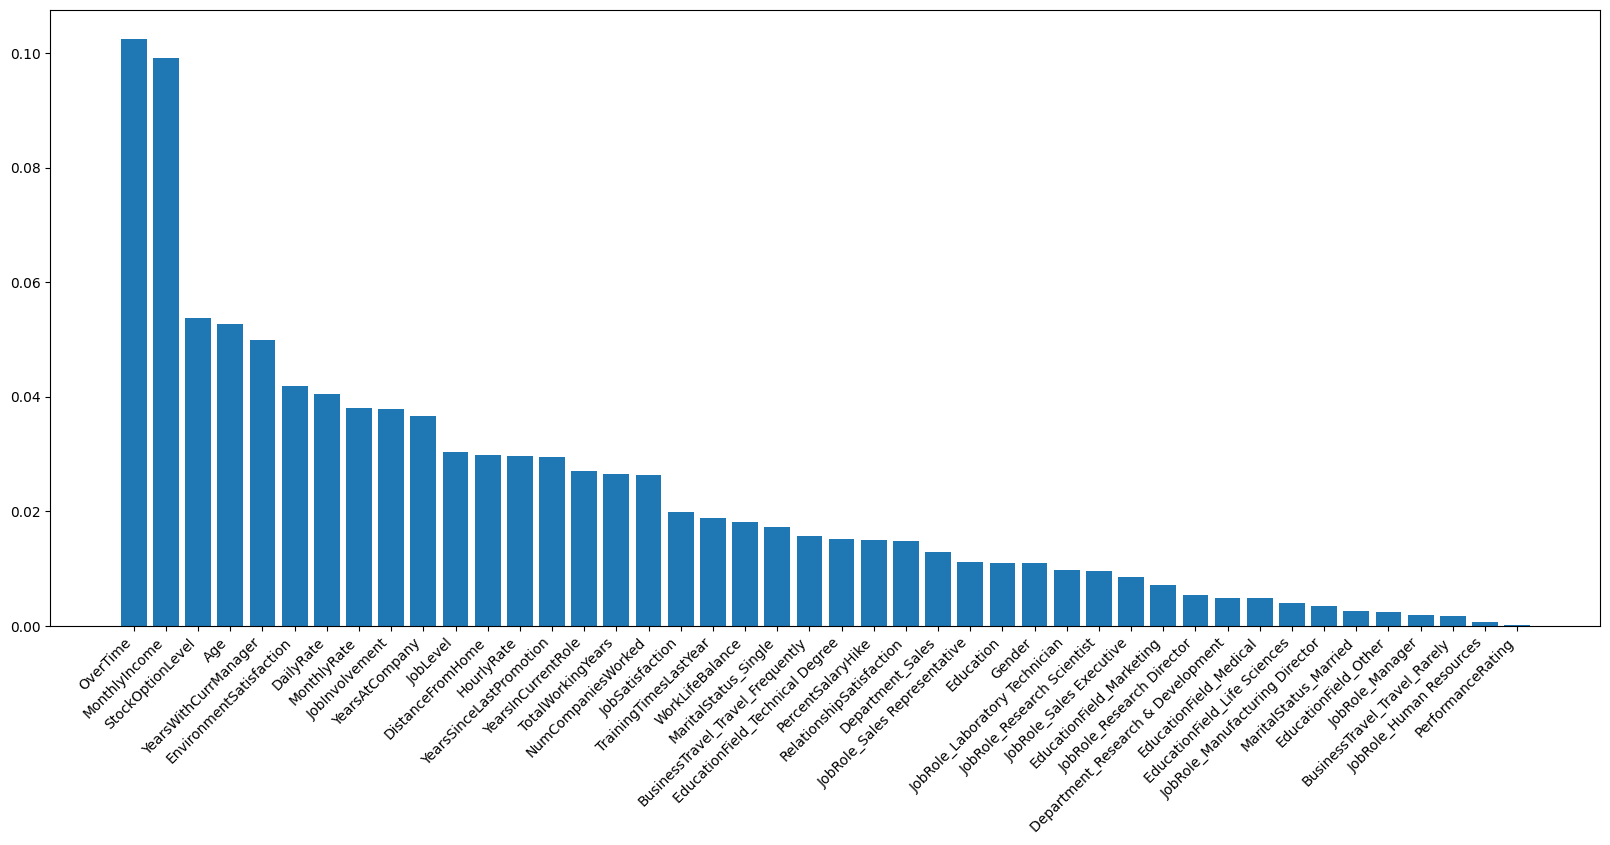

In [25]:
sorted_importance = dict(sorted(zip(model.feature_names_in_, model.feature_importances_),key=lambda x:x[1] , reverse=True))

plt.figure(figsize=(20,8))
plt.bar(sorted_importance.keys(), sorted_importance.values())
plt.xticks(rotation=45,ha='right')
plt.show()

In [ ]:

y_prob = model.predict_proba(X_test)[:,1]

df0 = df.loc[X_test.index].copy()

df0['Attrition'] = y_test
df0['Risk']=y_prob


df0=df0.sort_values(by='Risk', ascending=False)


columns_to_show = ['Risk', 'Attrition', 'JobLevel', 'MonthlyIncome', 'Age', 'OverTime',]

print(df0[columns_to_show].head(10))


          Risk  Attrition  JobLevel  MonthlyIncome  Age  OverTime
8     0.991401          1         1           1675   19         1
13    0.984571          1         1           2121   19         1
88    0.982321          1         1           3172   24         1
303   0.966624          1         2           5765   29         0
2     0.931950          1         1           1878   18         1
1125  0.915441          1         1           2437   43         1
21    0.881703          1         1           2973   20         0
290   0.865160          1         1           2404   29         1
229   0.847934          0         1           1052   28         0
208   0.846038          1         1           2863   27         0
